# Driving in Circles

AutomotiveDrivingModels is templated to efficiently run different types of simulations.
Entities are parameterized by their:

- *S* state, which changes over time
- *D* defintion, which does not change over time
- *I* id, typically an `Int`, which uniquely identifies that entity.

In addition to these types, the actions, environment and the driver models can also be parameterized.

This notebook demonstrates a 2D driving simulation where cars drive in a multi-lane stadium.
The types are:

- *S* - `VehicleState`, containing both the global and lane-relative position, and speed
- *D* - `VehicleDef`, containing length, width, and class
- *I* - `Int`

We use a `Roadway` as our environment. The `Roadway` type is based on the RNDF format.

In [1]:
using Revise
using AutomotiveDrivingModels
using AutoViz
using Distributions

┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\Revise\M1Qoh.ji for Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1184


We generate a 3-lane stadium roadway:

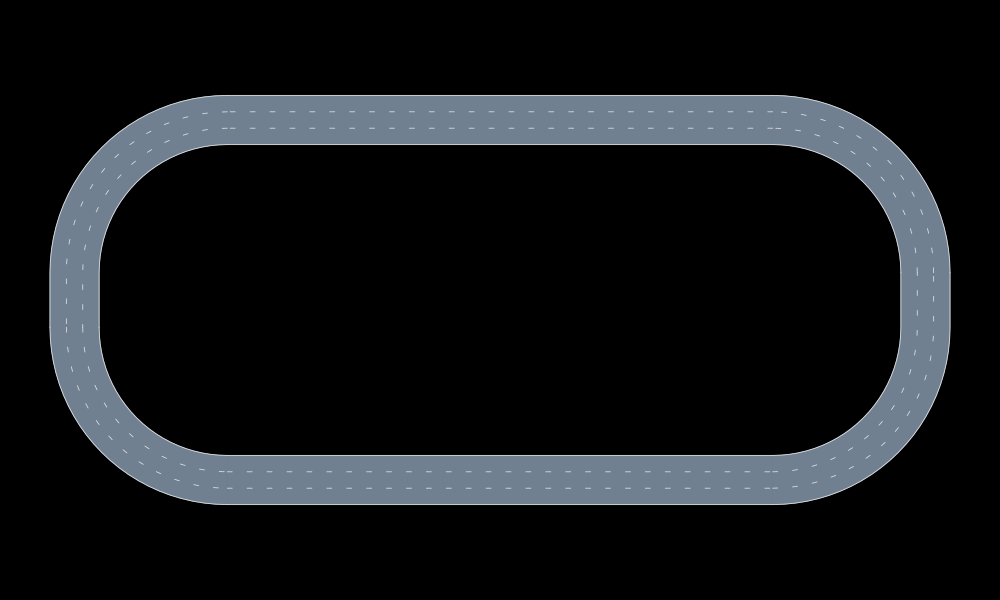

In [2]:
roadway = gen_stadium_roadway(3)

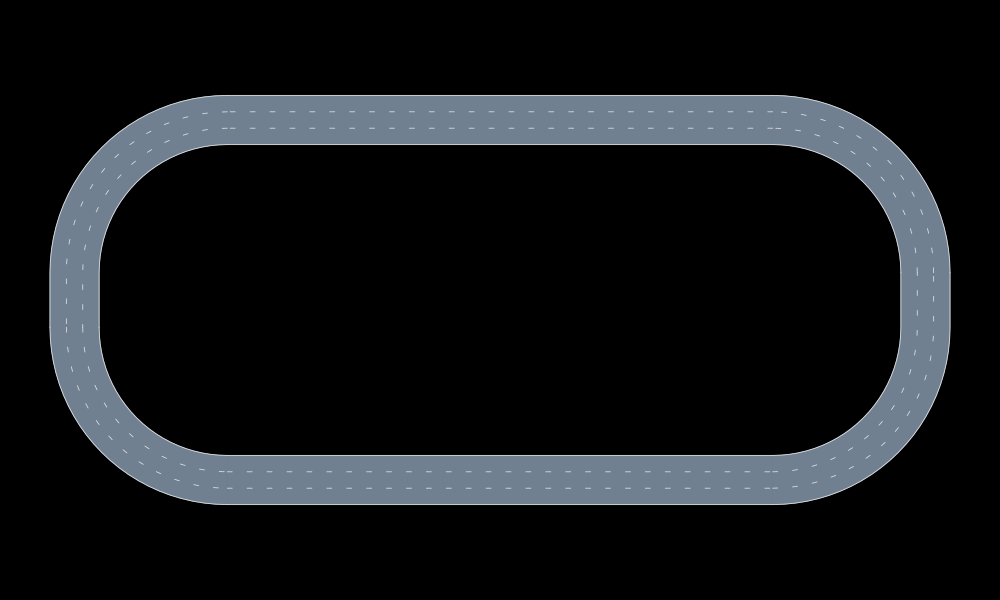

In [3]:
c = render([roadway])

Let's populate a scene.

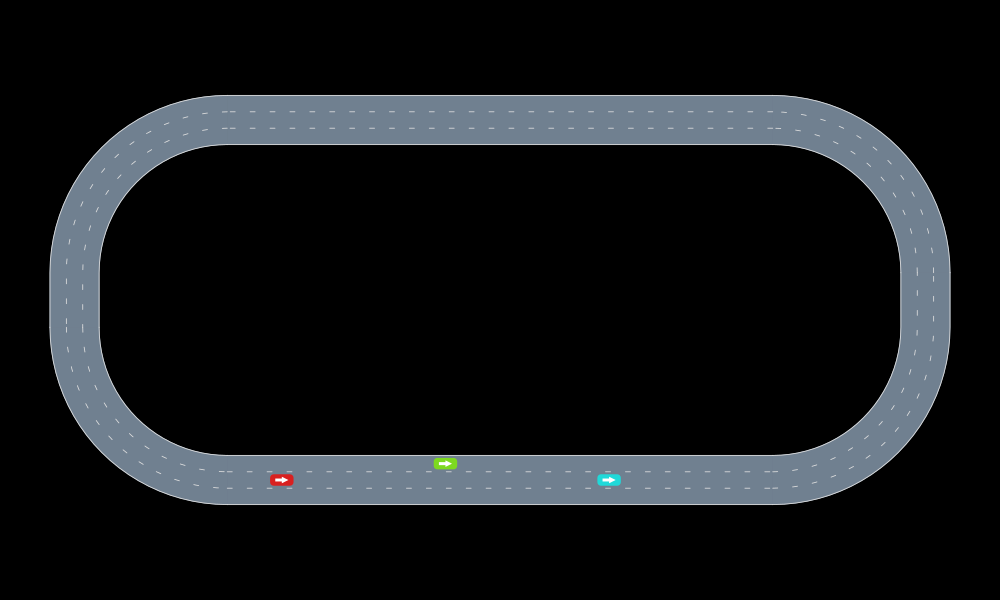

In [4]:
scene = Scene()
push!(scene,Vehicle(VehicleState(VecSE2(10.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 29.0), VehicleDef(), 1))
push!(scene,Vehicle(VehicleState(VecSE2(40.0,0.0,0.0), roadway, 22.0), VehicleDef(), 2))
push!(scene,Vehicle(VehicleState(VecSE2(70.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 27.0), VehicleDef(), 3))

car_colors = get_pastel_car_colors(scene)
cam = FitToContentCamera()
render(scene, roadway, cam=cam, car_colors=car_colors)

Let's assign driver models.

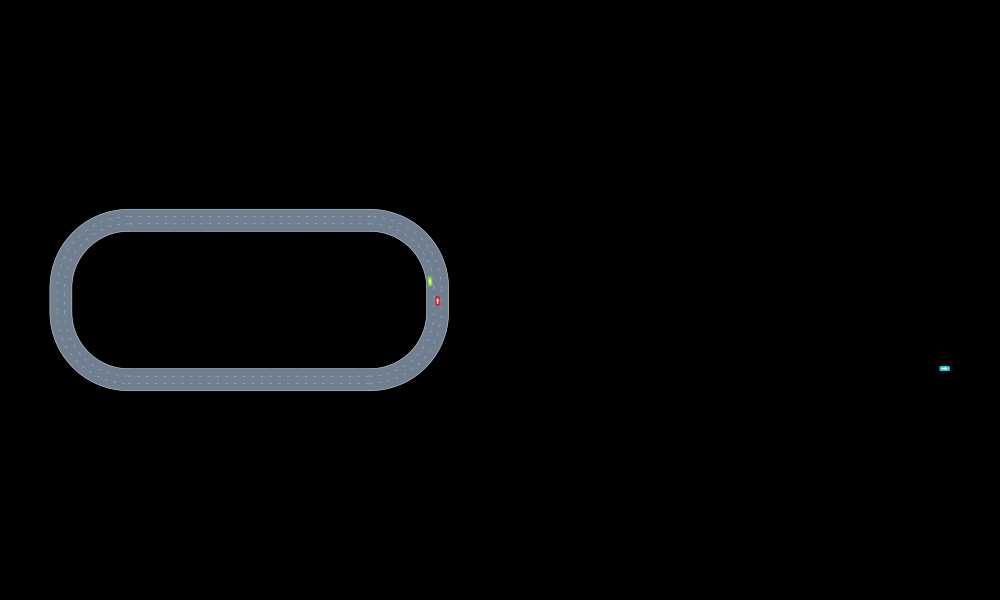

In [5]:
timestep = 0.1

models = Dict{Int, DriverModel}()
models[1] = LatLonSeparableDriver( # produces LatLonAccels
        ProportionalLaneTracker(), # lateral model
        IntelligentDriverModel(), # longitudinal model
)
models[2] = Tim2DDriver(timestep,
        mlane = MOBIL(timestep),
    )
models[3] = StaticDriver{AccelTurnrate, MvNormal}(MvNormal([0.0,0.0], [1.0,0.1]))

set_desired_speed!(models[1], 12.0)
set_desired_speed!(models[2], 10.0)
set_desired_speed!(models[3],  8.0)

nticks = 100
rec = SceneRecord(nticks+1, timestep)
simulate!(rec, scene, roadway, models, nticks)
render(rec[0], roadway, cam=cam, car_colors=car_colors)

We can use interact to inspect the simulation record. Note that the static driver just drives off the road.

In [6]:
using Interact
@manipulate for frame_index in 1 : nframes(rec)
    render(rec[frame_index-nframes(rec)], roadway, cam=cam, car_colors=car_colors)
end

┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\Interact\XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1184
┌ Warning: Module Compat with build ID 73185168857485 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Compat with build ID 73185168857485 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Compat with build ID 73185168857485 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Compat with build ID 73185168857485 is missing from the cache.
│ This may mean Compat [34da2185-b29

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4922556032140852651\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10067841123359756433\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/480aa5cd5f789d277864e802eb30666b8331a53b-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-4922556032140852651\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\CSSUtil\nYzDI.ji for CSSUtil [70588ee8-6100-5070-97c1-3cb50ed05fe8]
└ @ Base loading.jl:1184
┌ Error: evaluation error
│   mod = Main.WebIO
│   ex = using Observables
│   exception = (ArgumentError("Package Observables not found in current path:\n- Run `import Pkg; Pkg.add(\"Observables\")` to install the Observables package.\n"), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x0000000002395d39, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a2c7968, Ptr{Nothing} @0x000000043a2c8b00, Ptr{Nothing} @0x000000043a2c93b1, Ptr{Nothing} @0x00000000023d8f32, Ptr{Nothing} @0x00000000023d8f04, Ptr{Nothing} @0x00000000023d405a, Ptr{Nothing} @0x000000043a2924a5, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023d3994, Ptr{Nothing} @0x00000000023d39fb, Ptr{Nothing} @0x000000043a2924a5, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @

┌ Error: evaluation error
│   mod = Main.WebIO
│   ex = const Application = Union{Scope, Node, AbstractWidget, Observable}
│   exception = (UndefVarError(:Scope), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x000000043a2ff632, Ptr{Nothing} @0x000000043a41409a, Ptr{Nothing} @0x000000000240f2cd, Ptr{Nothing} @0x000000000240f7ab, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x00000000023e4479, Ptr{Nothing} @0x00000000023e6f7f, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023e31e1, Ptr{Nothing} @0x00000000023e325c, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x00000000023d4104, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023d3994, Ptr{Nothing} @0x00000000023d39fb, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x00000000023d30c3, Ptr{Nothing} @0x00000000023d37c7, Ptr{Nothing} @0x000000043a2924a5, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023cb216, Ptr{Nothing} @0x0000

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8443306435956692767\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6603188948874743474\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/480aa5cd5f789d277864e802eb30666b8331a53b-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-8443306435956692767\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Warning: omitting call expression (WebIO.register_request_handler)("rpc", WebIO.handle_rpc_request) in ("none", 0)
└ @ Revise C:\Users\Maxime\.julia\packages\Revise\RW8TD\src\lowered.jl:167
┌ Warning: Module Compat with build ID 73185168857485 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\JSExpr\uKlm7.ji for JSExpr [97c1335a-c9c5-57fe-bc5d-ec35cebe8660]
└ @ Base loading.jl:1184
┌ Error: evaluation error
│   mod = Main.CSSUtil
│   ex = using Compat
│   exception = (ArgumentError("Package Compat not found in current path:\n- Run `import Pkg; Pkg.add(\"Compat\")` to install the Compat package.\n"), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x0000000002395d39, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing}

┌ Error: evaluation error
│   mod = Main.CSSUtil
│   ex = const empty = (#= C:\Users\Maxime\.julia\packages\CSSUtil\XRQFp\src\CSSUtil.jl:42 =# @dom_str("div"))()
│   exception = (LoadError("C:\\Users\\Maxime\\.julia\\packages\\CSSUtil\\XRQFp\\src\\CSSUtil.jl", 42, UndefVarError(Symbol("@dom_str"))), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x000000043a2ff632, Ptr{Nothing} @0x000000043a412460, InterpreterIP(nothing, 0x0000080200000244), Ptr{Nothing} @0x000000043a2c83c0, Ptr{Nothing} @0x000000043a29a29e, Ptr{Nothing} @0x000000043a29dfbb, Ptr{Nothing} @0x000000043a29ddba, Ptr{Nothing} @0x000000043a29ddba, Ptr{Nothing} @0x000000043a29ddba, Ptr{Nothing} @0x000000043a29eed1, Ptr{Nothing} @0x000000000243ee42, Ptr{Nothing} @0x000000000243b5ba, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023d3994, Ptr{Nothing} @0x00000000023d39fb, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x00000000023d30c3, Ptr{Noth

┌ Error: evaluation error
│   mod = Main.CSSUtil
│   ex = (JSON.lower(l::Length{u}) where u) = begin
        #= C:\Users\Maxime\.julia\packages\CSSUtil\XRQFp\src\CSSUtil.jl:66 =#
        "$(l.value)$(u)"
    end
│   exception = (UndefVarError(:JSON), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x000000043a2ff632, Ptr{Nothing} @0x000000043a41409a, Ptr{Nothing} @0x000000000240f2cd, Ptr{Nothing} @0x00000000024441fc, Ptr{Nothing} @0x0000000002446cbf, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x0000000002442f61, Ptr{Nothing} @0x0000000002442fdc, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000000243b664, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023d3994, Ptr{Nothing} @0x00000000023d39fb, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x00000000023d30c3, Ptr{Nothing} @0x00000000023d37c7, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023cb216, Ptr{Nothing} @0x00000000023cbd0d, 

┌ Error: evaluation error
│   mod = Main.MacroTools
│   ex = using CSTParser
│   exception = (ArgumentError("Package CSTParser not found in current path:\n- Run `import Pkg; Pkg.add(\"CSTParser\")` to install the CSTParser package.\n"), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x0000000002395d39, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a2c7968, Ptr{Nothing} @0x000000043a2c8b00, Ptr{Nothing} @0x000000043a2c93b1, Ptr{Nothing} @0x000000000248066a, Ptr{Nothing} @0x000000000248063c, Ptr{Nothing} @0x000000000247cbfa, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023d3994, Ptr{Nothing} @0x00000000023d39fb, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x00000000023d30c3, Ptr{Nothing} @0x00000000023d37c7, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023cb216, Ptr{Nothing} @0x00000000023cbd0d, Ptr{Nothing} @0x00000000023cd864, Ptr{Nothing} @0x00000000023c9f8e, Ptr{Nothing} @

┌ Error: evaluation error
│   mod = Main.MacroTools
│   ex = resize!(animals, length(_animals))
│   exception = (UndefVarError(:_animals), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x000000043a2ff632, Ptr{Nothing} @0x000000043a41409a, Ptr{Nothing} @0x000000000240f2cd, Ptr{Nothing} @0x0000000001df9b3c, Ptr{Nothing} @0x0000000001dfc5ef, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x0000000001df88a1, Ptr{Nothing} @0x0000000001df891c, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000000247cca4, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023d3994, Ptr{Nothing} @0x00000000023d39fb, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x00000000023d30c3, Ptr{Nothing} @0x00000000023d37c7, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x00000000023cb216, Ptr{Nothing} @0x00000000023cbd0d, Ptr{Nothing} @0x00000000023cd864, Ptr{Nothing} @0x00000000023c9f8e, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothin

┌ Warning: Module WebIO with build ID 73392849544173 is missing from the cache.
│ This may mean WebIO [0f1e0344-ec1d-5b48-a673-e5cf874b6c29] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Accessing scope.id is deprecated; use scopeid(scope) instead.
│   caller = ip:0x0
└ @ Core :-1


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["frame_index"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Maxime\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Maxime\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\R8JgH\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\R8JgH\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Maxime\\.julia\\packages\\Interact\\0klKX\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"6

We can save the run to a text file. We achieve this by first converting the the `Trajdata` type and then exporting that.

In [7]:
listrec = convert(Trajdata, rec)
open("2Dstadium_listrec.txt", "w") do io
    write(io, MIME"text/plain"(), listrec)
end

The file can be loaded in a similar way.

In [8]:
listrec2 = open("2Dstadium_listrec.txt", "r") do io
    read(io, MIME"text/plain"(), Trajdata)
end

Trajdata(101 frames)